In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math 
from scipy.stats import beta

In [17]:
#initial Values

iter = 2000
banditProb = [0.2,0.5,0.75]

In [18]:
class Casino:
    def __init__(self,p) :
        self.p = p
        self.a = 1
        self.b = 1
        self.N = 0


    def pull(self):
        return np.random.random() < self.p
    
    def sample(self):
        return np.random.beta(self.a,self.b)

    def update(self,x):
        self.N += 1
        if(x==0):
            self.b += 1
        else:
            self.a += 1

In [19]:
def plot(casinos,iter):
    x = np.linspace(0,1,200)
    for b in casinos:
        y = beta.pdf(x,b.a,b.b)
        plt.plot(x,y,label=f"real p : {b.p:.4f}, win rate = {b.a -1}/{b.N}")
        plt.title(f"Bandit distributions after {iter} trails")
    plt.legend()
    plt.show()
        

In [20]:
def experiment():
    casinos = [Casino(p) for p in banditProb]

    sample_points = [5,10,20,100,200,500,1000,1500,1999]
    rewards = np.zeros(iter)

    for i in range(iter):


        j = np.argmax([b.sample() for b in casinos])

        if i in sample_points:
            plot(casinos,i)

        x = casinos[j].pull()

        rewards[i] = x
        casinos[j].update(x)

        

    print("total rewards :", rewards.sum())


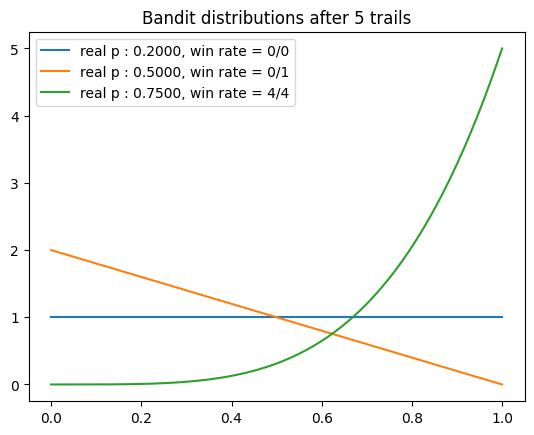

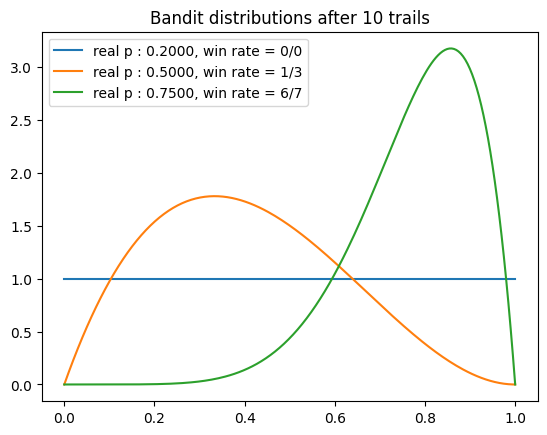

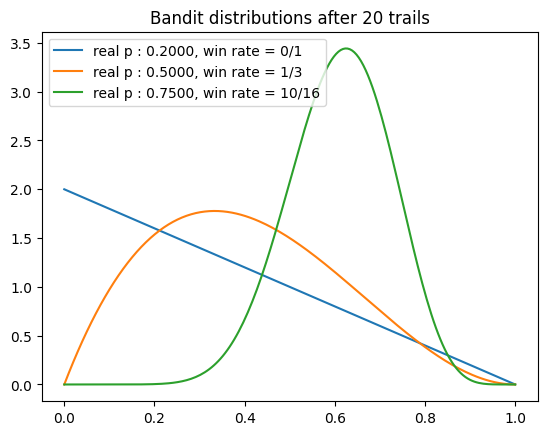

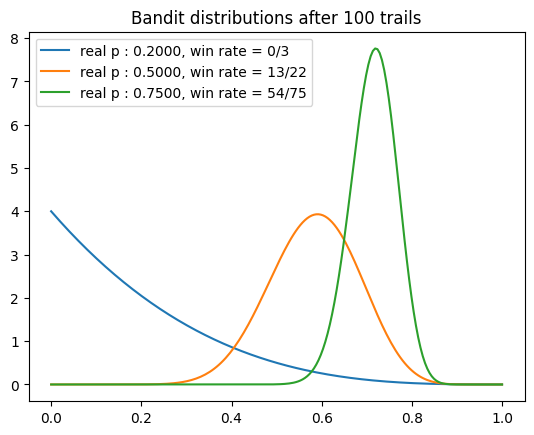

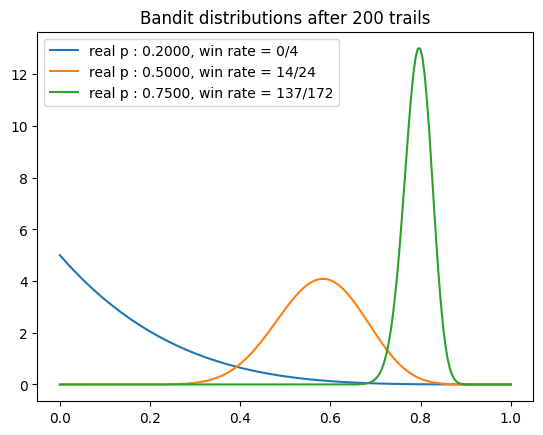

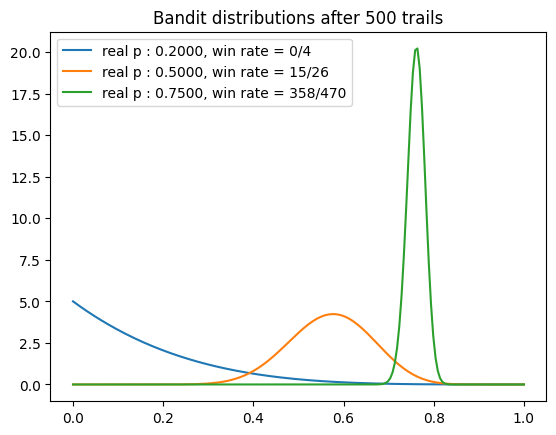

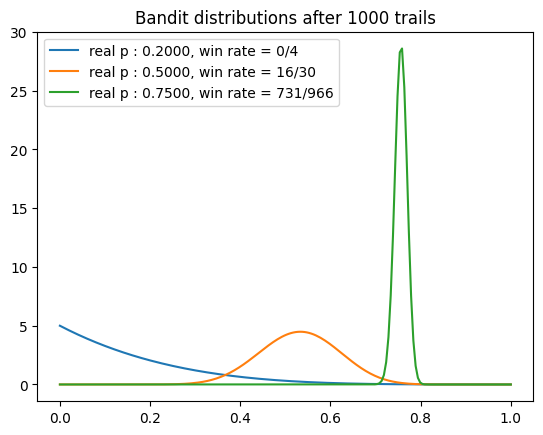

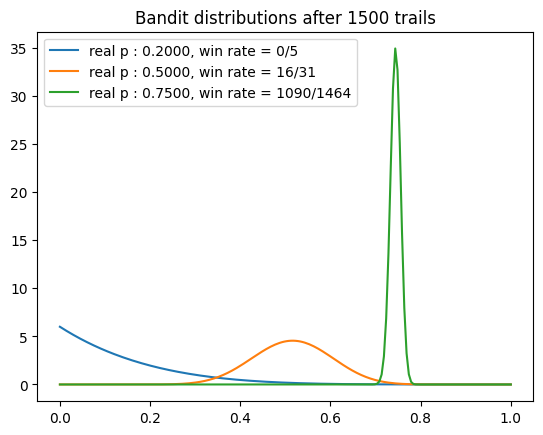

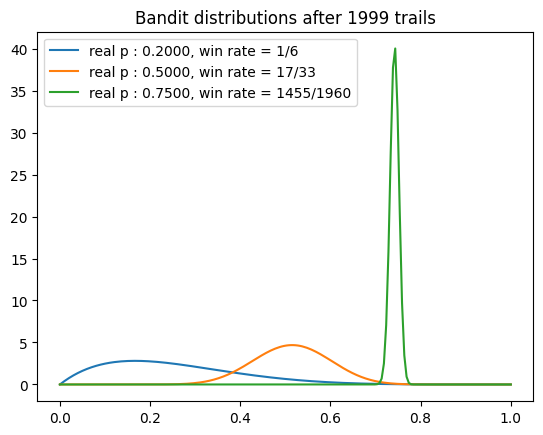

total rewards : 1474.0


In [21]:

if __name__ == "__main__":
    experiment()
